In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy import stats

In [2]:
df_train=pd.read_csv('train_titanic.csv')
df_test=pd.read_csv('test_titanic.csv')


In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

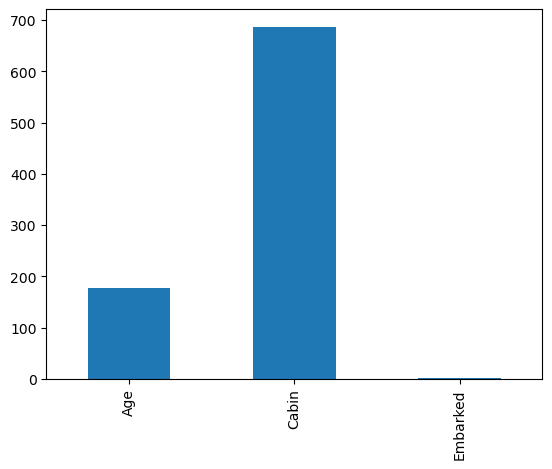

In [5]:
missing_visualize =df_train.isnull().sum()
missing_visualize = missing_visualize[missing_visualize > 0]
missing_visualize.plot.bar()

In [6]:
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_train['Embarked'].fillna('S', inplace=True)
df_train = df_train.drop(['Cabin'], axis=1)

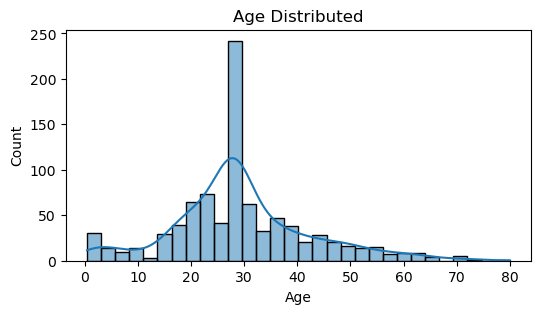

In [7]:
plt.figure(figsize=(6,3))
sns.histplot(df_train["Age"],kde=True)
plt.title("Age Distributed")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

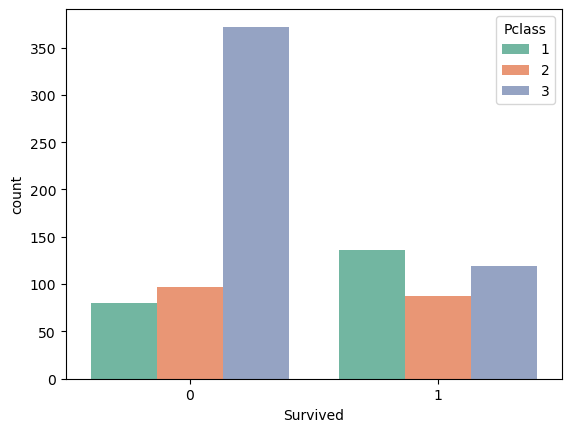

In [8]:
sns.countplot(x='Survived', hue='Pclass', data=df_train, palette='Set2')


<Axes: xlabel='Survived', ylabel='count'>

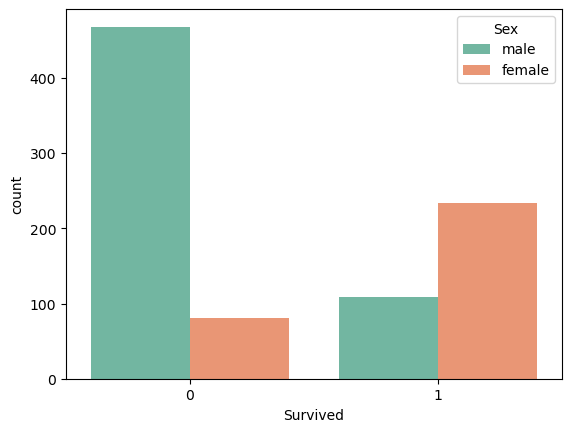

In [9]:
sns.countplot(x='Survived', hue='Sex', data=df_train, palette='Set2')

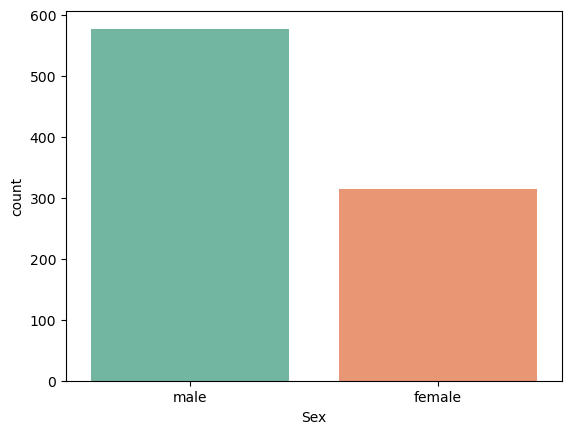

In [10]:
sns.countplot(x='Sex', data=df_train, palette='Set2')
plt.show()

In [11]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
df_train.drop([ 'Name','Ticket','Fare',],inplace=True,axis=1)

<Axes: xlabel='Pclass', ylabel='Age'>

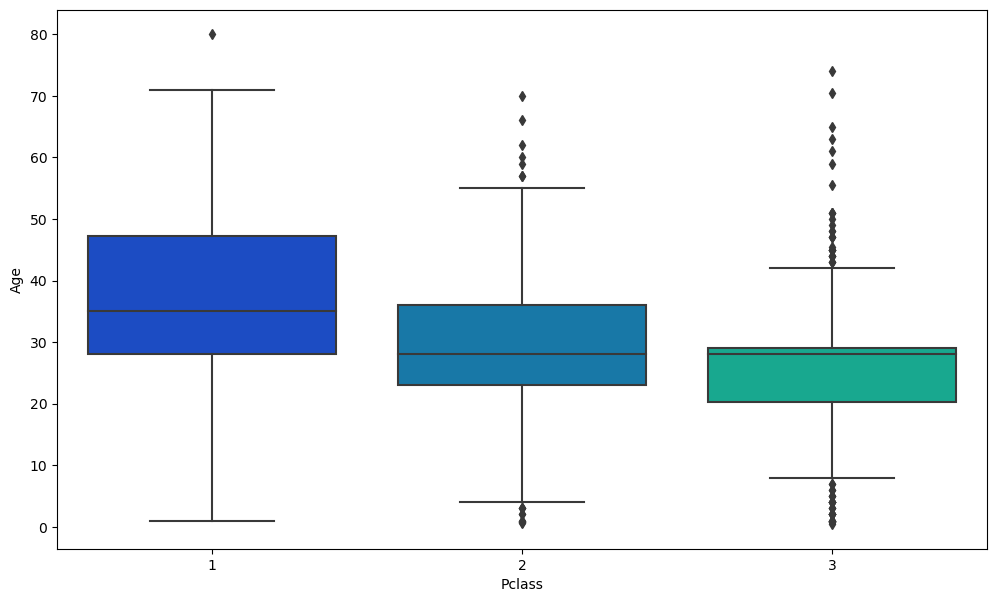

In [13]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df_train,palette='winter')


In [14]:
numerical_cols = df_train.select_dtypes(include=['float64', 'int64'])
z_scores = np.abs(zscore(numerical_cols))


In [15]:
np.abs(stats.zscore(z_scores)).shape


(891, 6)

In [16]:
df_train = df_train[(np.abs(stats.zscore(numerical_cols)) < 3).all(axis=1)] # axis= 1 row
df_train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [17]:
df_train=pd.get_dummies(df_train, columns=["Embarked", "Sex"])
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,22.0,1,0,False,False,True,False,True
1,2,1,1,38.0,1,0,True,False,False,True,False
2,3,1,3,26.0,0,0,False,False,True,True,False
3,4,1,1,35.0,1,0,False,False,True,True,False
4,5,0,3,35.0,0,0,False,False,True,False,True


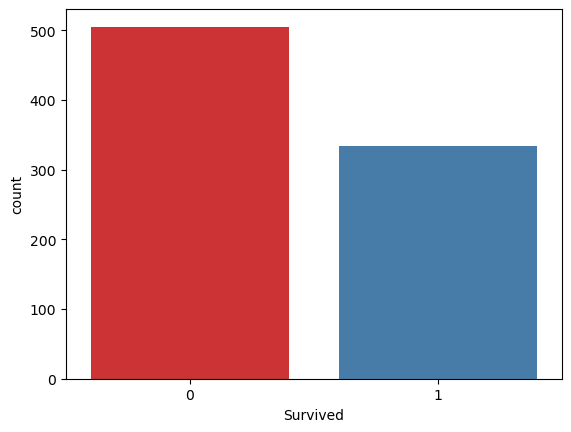

In [18]:
sns.countplot(x='Survived', data=df_train, palette='Set1')
plt.show()

In [19]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [20]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [21]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [22]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

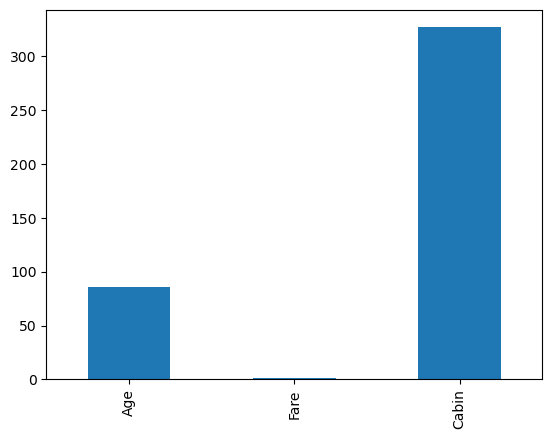

In [23]:
missing_visualize =df_test.isnull().sum()
missing_visualize = missing_visualize[missing_visualize > 0]
missing_visualize.plot.bar()

In [24]:
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
df_test['Fare'].fillna(df_test['Fare'].mode(), inplace=True)
df_test = df_test.drop(['Cabin'], axis=1)
df_test.drop([ 'Name','Ticket','Fare',],inplace=True,axis=1)

In [25]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [26]:
df_test.duplicated().sum()


0

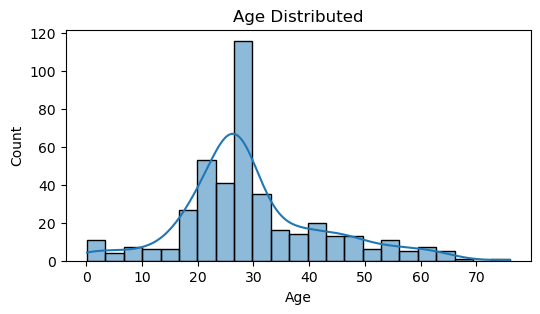

In [27]:
plt.figure(figsize=(6,3))
sns.histplot(df_test["Age"],kde=True)
plt.title("Age Distributed")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [28]:
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34.5,0,0,Q
1,893,3,female,47.0,1,0,S
2,894,2,male,62.0,0,0,Q
3,895,3,male,27.0,0,0,S
4,896,3,female,22.0,1,1,S
...,...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0,S
414,1306,1,female,39.0,0,0,C
415,1307,3,male,38.5,0,0,S
416,1308,3,male,27.0,0,0,S


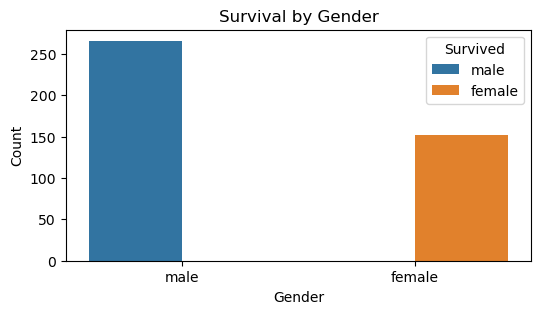

In [29]:
plt.figure(figsize=(6,3))
sns.countplot(data=df_test,x="Sex",hue="Sex")
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived",loc="upper right")
plt.show()

In [30]:
df_test=pd.get_dummies(df_test, columns=["Embarked", "Sex"])
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,892,3,34.5,0,0,False,True,False,False,True
1,893,3,47.0,1,0,False,False,True,True,False
2,894,2,62.0,0,0,False,True,False,False,True
3,895,3,27.0,0,0,False,False,True,False,True
4,896,3,22.0,1,1,False,False,True,True,False


<Axes: xlabel='Pclass', ylabel='Age'>

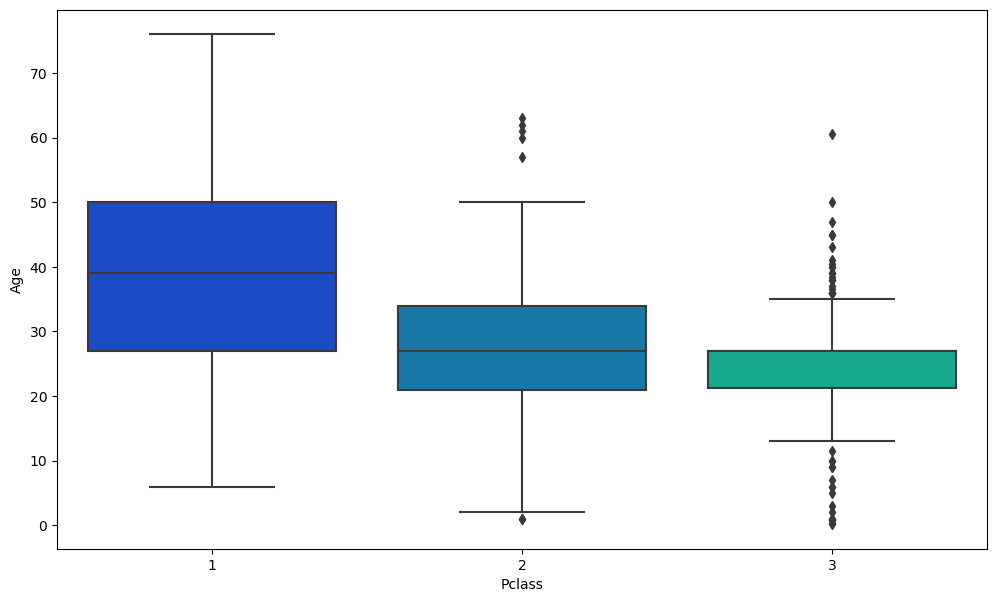

In [31]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df_test,palette='winter')


In [32]:
numerical_cols = df_test.select_dtypes(include=['float64', 'int64'])
z_scores = np.abs(zscore(numerical_cols))

In [33]:
np.abs(stats.zscore(z_scores)).shape


(418, 5)

In [34]:
df_test = df_test[(np.abs(stats.zscore(numerical_cols)) < 3).all(axis=1)] # axis= 1 row
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,892,3,34.5,0,0,False,True,False,False,True
1,893,3,47.0,1,0,False,False,True,True,False
2,894,2,62.0,0,0,False,True,False,False,True
3,895,3,27.0,0,0,False,False,True,False,True
4,896,3,22.0,1,1,False,False,True,True,False
